In [7]:
# 1. Load the Data

import pandas as pd

file_path = 'loan.csv'
df = pd.read_csv(file_path, low_memory=False) #To avoid the warning but may not solve the underlying issue of mixed data types.
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
# Understand the Data

In [8]:
# Display the first few rows
print(df.head())

# Display the data types of each column
print(df.dtypes)

# Get summary statistics
print(df.describe())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [21]:
#Dropping unused columns
# Columns to drop by name

columns_to_drop_by_name = ['id', 'member_id', 'url', 'desc','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','application_type','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','pub_rec_bankruptcies','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','zip_code','title']


# Drop the columns
df.drop(columns=columns_to_drop_by_name, inplace=True)

In [22]:
# Check for columns with mixed types
mixed_type_columns = df.select_dtypes(include=['object']).columns

for col in mixed_type_columns:
    print(f"Column: {col}")
    print(df[col].unique())

Column: term
[' 36 months' ' 60 months']
Column: int_rate
['10.65%' '15.27%' '15.96%' '13.49%' '12.69%' '7.90%' '18.64%' '21.28%'
 '14.65%' '9.91%' '16.29%' '6.03%' '11.71%' '12.42%' '14.27%' '16.77%'
 '7.51%' '8.90%' '18.25%' '6.62%' '19.91%' '17.27%' '17.58%' '21.67%'
 '19.42%' '22.06%' '20.89%' '20.30%' '23.91%' '19.03%' '23.52%' '23.13%'
 '22.74%' '22.35%' '24.11%' '6.00%' '22.11%' '7.49%' '11.99%' '5.99%'
 '10.99%' '9.99%' '18.79%' '11.49%' '8.49%' '15.99%' '16.49%' '6.99%'
 '12.99%' '15.23%' '14.79%' '5.42%' '10.59%' '17.49%' '15.62%' '21.36%'
 '19.29%' '13.99%' '18.39%' '16.89%' '17.99%' '20.62%' '20.99%' '22.85%'
 '19.69%' '20.25%' '23.22%' '21.74%' '22.48%' '23.59%' '12.62%' '18.07%'
 '11.63%' '7.91%' '7.42%' '11.14%' '20.20%' '12.12%' '19.39%' '16.11%'
 '17.54%' '22.64%' '13.84%' '16.59%' '17.19%' '12.87%' '20.69%' '9.67%'
 '21.82%' '19.79%' '18.49%' '22.94%' '24.59%' '24.40%' '21.48%' '14.82%'
 '14.17%' '7.29%' '17.88%' '20.11%' '16.02%' '17.51%' '13.43%' '14.91%'
 '13.06%' 

In [15]:
4. # Convert Columns to Consistent Types


In [16]:
# cleaning employee length column 
# Define mapping
emp_length_map = {
    '10+ years': 10,
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9
    # Add more mappings as needed
}

# Map emp_length to numeric values
df['emp_length_numeric'] = df['emp_length'].map(emp_length_map)


In [17]:
#Converting  int_rate to numeric
df['int_rate_numeric'] = df['int_rate'].str.rstrip('%').astype('float')

In [23]:
#Handle Missing Values

print(df.isnull().sum())

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq        25682
mths_since_last_record        36931
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                  

In [24]:
#Identify Outliers

import numpy as np

# Define a function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to relevant columns
for column in ['loan_amnt', 'annual_inc', 'dti', 'revol_bal', 'total_acc']:
    df = remove_outliers(df, column)

In [25]:
# Analyzing Patterns of Loan Defaulters

# Define a column indicating default status
df['default'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default', 'Late (31-120 days)'] else 0)

# Analyze default rates by loan grade
default_rate_by_grade = df.groupby('grade')['default'].mean()
print(default_rate_by_grade)

# Analyze default rates by employment length
default_rate_by_emp_length = df.groupby('emp_length')['default'].mean()
print(default_rate_by_emp_length)

grade
A    0.060579
B    0.121300
C    0.169410
D    0.214034
E    0.252979
F    0.302168
G    0.366197
Name: default, dtype: float64
emp_length
1 year       0.142116
10+ years    0.152088
2 years      0.130158
3 years      0.136276
4 years      0.132082
5 years      0.139333
6 years      0.139752
7 years      0.138582
8 years      0.135069
9 years      0.129735
< 1 year     0.137998
Name: default, dtype: float64


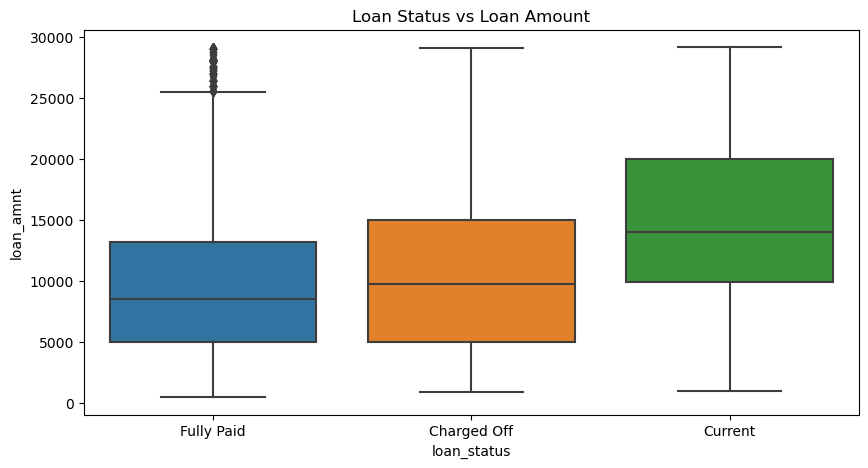

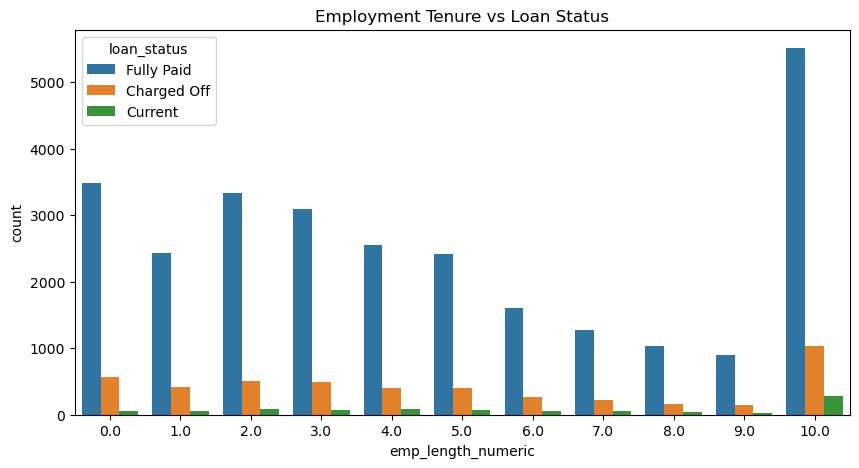

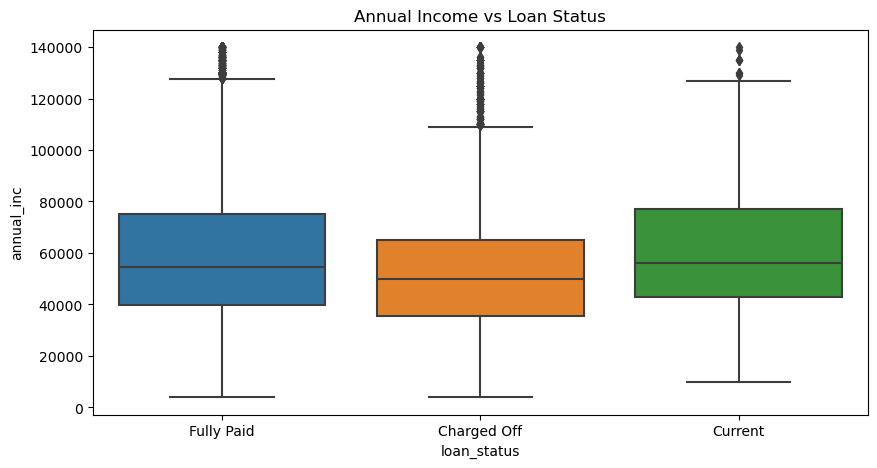

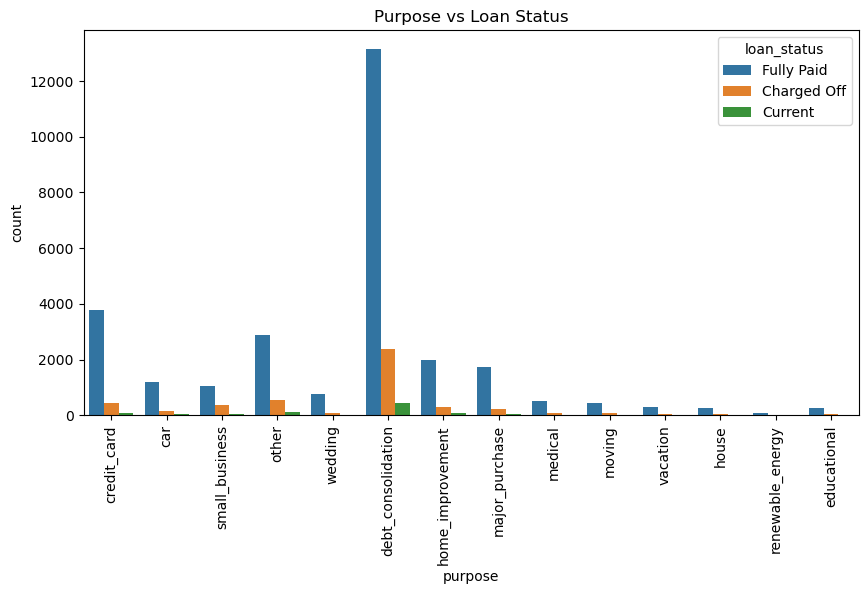

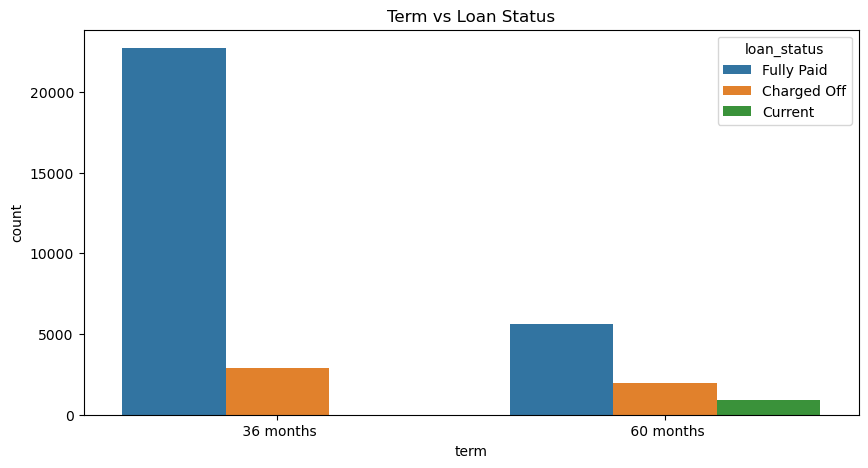

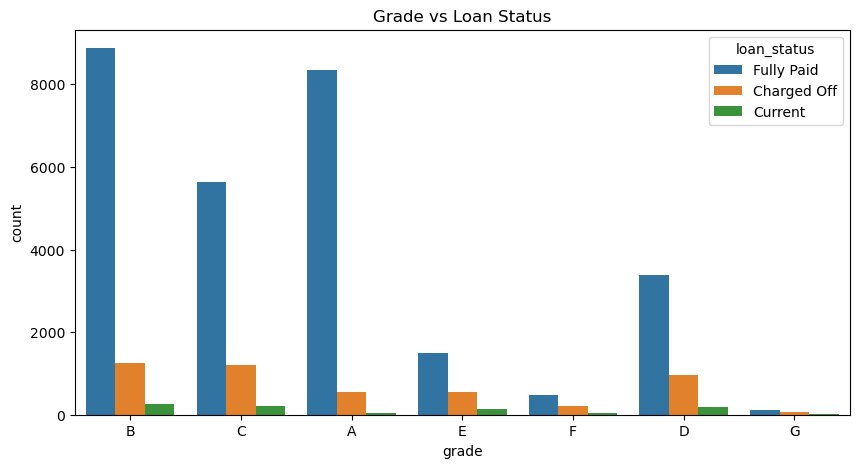

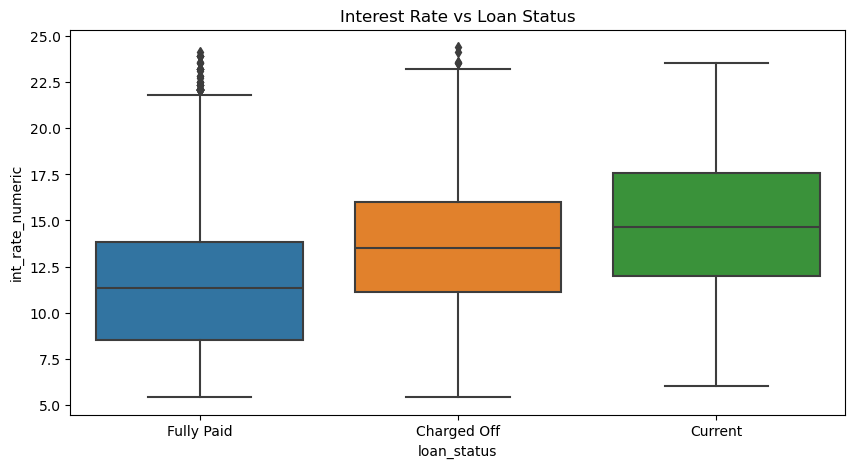

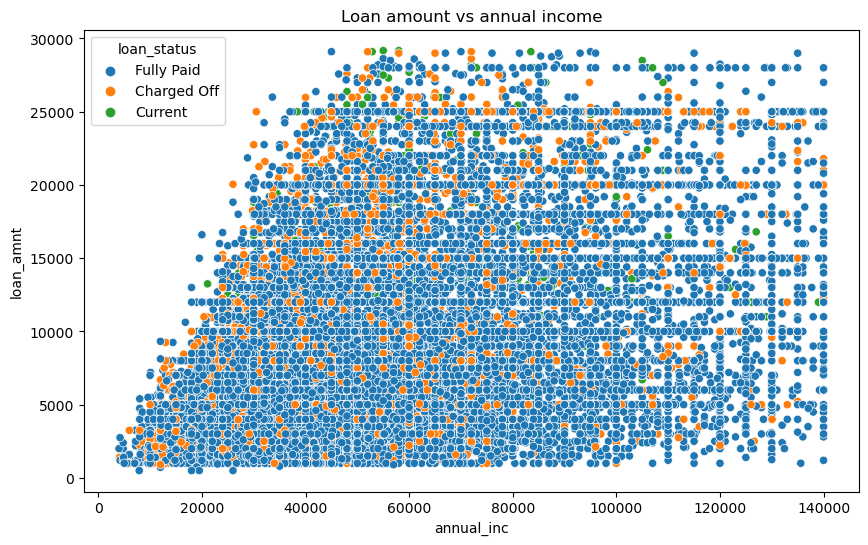

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


#plot graph for Loan status vs Loan Amount

plt.figure(figsize=(10,5))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
plt.title('Loan Status vs Loan Amount')
plt.show()

#employment Tensure vs Loan Status
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length_numeric',hue='loan_status',data=df)
plt.title('Employment Tenure vs Loan Status')
plt.show()

#Home Ownership vs Loan Status
plt.figure(figsize=(10,5))
sns.boxplot(x='loan_status',y='annual_inc',data=df)
plt.title('Annual Income vs Loan Status')
plt.show()

#Purpose vs Loan Status
plt.figure(figsize=(10,5))
sns.countplot(x='purpose',hue='loan_status',data=df)
plt.title('Purpose vs Loan Status')
plt.xticks(rotation=90)
plt.show()

#Terms in months vs Loan Status
plt.figure(figsize=(10,5))
sns.countplot(x='term',hue='loan_status',data=df)
plt.title('Term vs Loan Status')
plt.show()

#Grade vs Loan Status
plt.figure(figsize=(10,5))
sns.countplot(x='grade',hue='loan_status',data=df)
plt.title('Grade vs Loan Status')
plt.show()


# convert int_rate to numeric
#df['int_rate_updated']=df['int_rate'].str.rstrip('%').astype('float')

#Interst Rate vs Loan Status
plt.figure(figsize=(10,5))
sns.boxplot(x='loan_status',y='int_rate_numeric',data=df)
plt.title('Interest Rate vs Loan Status')
plt.show()

# Loan amount vs Annual income , color coded by Loan Status
plt.figure(figsize=(10,6))
sns.scatterplot(x='annual_inc',y='loan_amnt',hue='loan_status',data=df)
plt.title('Loan amount vs annual income')
plt.show()



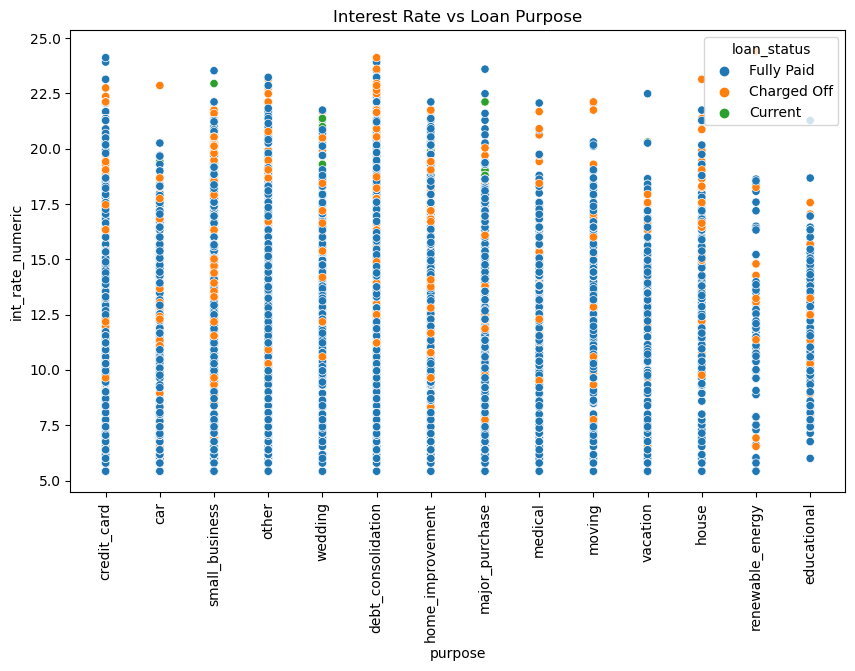

In [30]:
# Interest Rate vs Loan Purpose , grouped by Loan Status
plt.figure(figsize=(10,6))
sns.scatterplot(x='purpose',y='int_rate_numeric',hue='loan_status',data=df)
plt.title('Interest Rate vs Loan Purpose')
plt.xticks(rotation=90)
plt.show()

C:\Users\homer\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


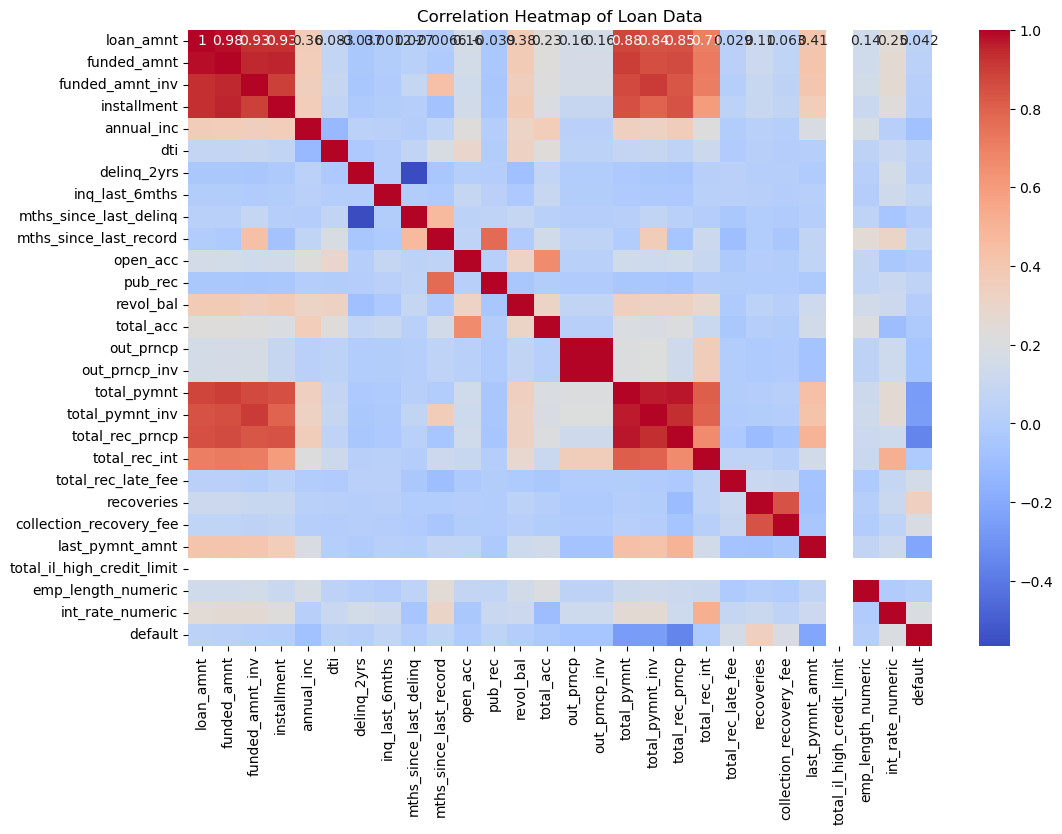

In [31]:
import matplotlib.pyplot as plt

#df['int_rate']=df['int_rate'].str.replace('%','').astype(float)

#select only numeric columns for correlation matrix
numeric_df=df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Loan Data')
plt.show()